# TALMEEZ-UL-REHMAN

# Task 3. Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’
#● As a business manager, try to find out the weak areas where you can
#work to make more profit.
#● What all business problems you can derive by exploring the data?

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
data = pd.read_csv("SampleSuperstore.csv")
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
data.shape

(9994, 13)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
data.isnull().sum()    #no null value

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [6]:
data['City'].nunique()  #number of unique cities

531

In [7]:
data['Category'].unique()  #3 categories

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [8]:
data['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [9]:
data['Sub-Category'].nunique()

17

 Which category has most selled?

In [10]:
data['Category'].value_counts().idxmax() 

'Office Supplies'

Which sub category has most selled?

In [11]:
data['Sub-Category'].value_counts().idxmax()

'Binders'

In [12]:
data['Sub-Category'].value_counts().idxmin()  #minimun sub category saled item

'Copiers'

#Visualization of Top selled category

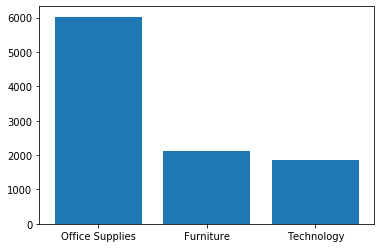

In [13]:
category_chart = data['Category'].value_counts().to_frame()
x = category_chart.index
y = category_chart['Category']
plt.bar(x,y)
plt.show()

#Visualization of Top 10 selled sub-category

In [20]:
sub_category_chart = data['Sub-Category'].value_counts().nlargest(10).to_frame()
px.bar(sub_category_chart, y = sub_category_chart['Sub-Category'], x = sub_category_chart.index, title = 'Top 10 Selling subcategory')

In [21]:
data.groupby('Sub-Category')['Sub-Category'].agg('count') #number of items of each subcategory

Sub-Category
Accessories     775
Appliances      466
Art             796
Binders        1523
Bookcases       228
Chairs          617
Copiers          68
Envelopes       254
Fasteners       217
Furnishings     957
Labels          364
Machines        115
Paper          1370
Phones          889
Storage         846
Supplies        190
Tables          319
Name: Sub-Category, dtype: int64

Top 5 cities whose purchased most items

In [28]:
data['City'] = data['City'].apply(lambda x: x.strip(''))
city_stats = data['City'].value_counts(ascending=False)
city_stats.head()

New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
Name: City, dtype: int64

In [33]:
segm=data.Segment.value_counts().reset_index()
segm.columns=('Segment','Count')
segm

,Segment,Count
0,Consumer,5191
1,Corporate,3020
2,Home Office,1783


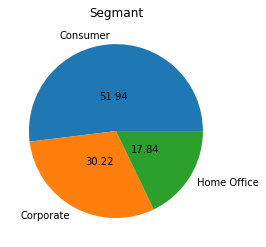

In [39]:
plt.pie(x="Count",labels="Segment",data=segm,radius=1,autopct="%.2f",pctdistance=0.4)
plt.title('Segmant')
plt.show()

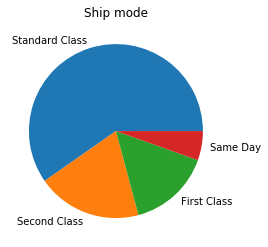

In [40]:
plt.pie(data['Ship Mode'].value_counts(),labels=data['Ship Mode'].value_counts().index)
plt.title('Ship mode')
plt.show()

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

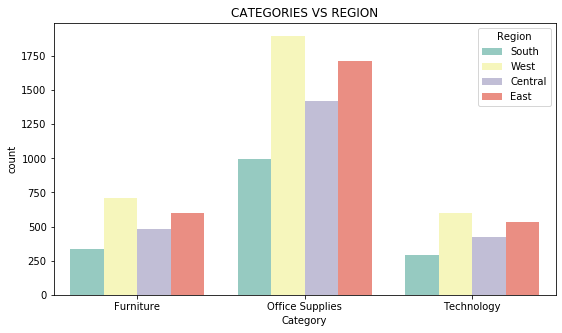

In [41]:
plt.figure(figsize=(9,5))
plt.title('CATEGORIES VS REGION')
sns.countplot(x=data['Category'],hue=data['Region'],palette='Set3')
plt.xticks()

In [51]:
data.Profit.max()

8399.976

Which cities have more profit?

In [58]:
high_profit=data[data["Profit"]>4000]
high_profit

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
4098,Standard Class,Consumer,United States,Minneapolis,Minnesota,55407,Central,Office Supplies,Binders,9449.95,5,0.0,4630.4755
4190,Standard Class,Consumer,United States,Newark,Delaware,19711,East,Technology,Copiers,10499.97,3,0.0,5039.9856
6826,Standard Class,Corporate,United States,Lafayette,Indiana,47905,Central,Technology,Copiers,17499.95,5,0.0,8399.9760
8153,First Class,Consumer,United States,Seattle,Washington,98115,West,Technology,Copiers,13999.96,4,0.0,6719.9808
9039,Standard Class,Consumer,United States,Detroit,Michigan,48205,Central,Office Supplies,Binders,9892.74,13,0.0,4946.3700


In [59]:
high_profit.shape

(5, 13)

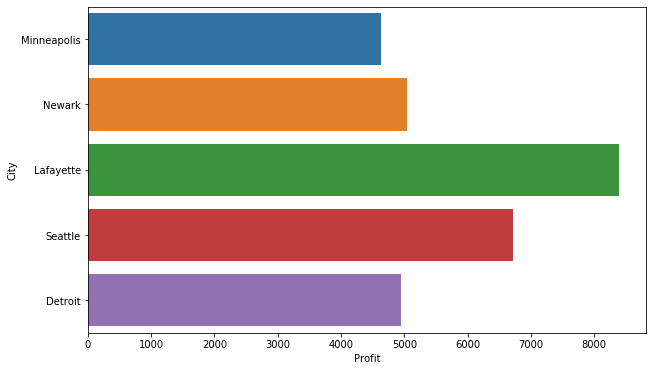

In [61]:
plt.figure(figsize=(10,6))
sns.barplot(x=high_profit["Profit"],y=high_profit["City"],data=data)

In [63]:
high_loss=data[data["Profit"]<0]  #where profit is in negative
high_loss

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
14,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Appliances,68.8100,5,0.80,-123.8580
15,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Binders,2.5440,3,0.80,-3.8160
23,Second Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Chairs,71.3720,2,0.30,-1.0196
27,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Bookcases,3083.4300,7,0.50,-1665.0522
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9920,Standard Class,Corporate,United States,Bryan,Texas,77803,Central,Office Supplies,Binders,22.3860,7,0.80,-35.8176
9921,Standard Class,Home Office,United States,Akron,Ohio,44312,East,Office Supplies,Binders,5.7420,3,0.70,-4.5936
9931,Standard Class,Consumer,United States,San Bernardino,California,92404,West,Furniture,Bookcases,683.3320,4,0.15,-40.1960
9937,Second Class,Corporate,United States,Los Angeles,California,90049,West,Furniture,Tables,71.0880,2,0.20,-1.7772


In [64]:
high_loss.shape  

(1871, 13)

In [ ]:
#so as a business manager we need to work on these above areas where we have profit in negative